In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from nltk.corpus import stopwords, gutenberg
from collections import Counter
import re
import scipy
import nltk
import warnings
warnings.filterwarnings("ignore")

In [131]:
per_15 = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
          'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
          'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
          'younger_sister_anon', 'st_stephen_anon']
per_16_17 = ['phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope']
per_18 = ['america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
          '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
          'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
          'darkness_byron', 'dear_doctor_byron']
per_19_1 =['of_mere_stevens', 'snowman_stevens', 'key_west_stevens', 'modern_poetry_stevens', 
           'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
           'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
           'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
           'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings']
per_19_2 = [ 'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 
             'sunflower_ginsberg', 'america_ginsberg', 'fever_plath', 
             'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 
             'phenom_woman_angelou','personal_ohara', 'ave_maria_ohara', 'the_day_ohara']

files = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
         'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
         'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
         'younger_sister_anon', 'st_stephen_anon', 'phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
         'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
         'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
         'universal_prayer_pope', 'ode_solitude_pope','america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
         'out_of_cradle_whitman', '340_dickinson', 
         '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
         'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
         'darkness_byron', 'dear_doctor_byron', 'of_mere_stevens', 'snowman_stevens', 
         'key_west_stevens', 'modern_poetry_stevens', 
         'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
         'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
          'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
         'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings',  'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 'sunflower_ginsberg', 'america_ginsberg',
         'fever_plath', 'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
         'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 'phenom_woman_angelou',
         'personal_ohara', 'ave_maria_ohara', 'the_day_ohara']
         

In [132]:
filedata = {file: open('C:\\Users\\justf\\Desktop\\txtfiles\\' + file + '.txt', 'r') for file 
            in files}

In [133]:
author = []
title = []
period = []
columns = []
text = []

In [134]:
def text_and_split(files):
    
    for file in files:
        poem = filedata[file].read()
        split = file.split('_')
        name = split[-1]
        work = split[:-1]
        text.append(poem)
        author.append(name)
        title.append(work)

In [135]:
text_and_split(per_15)
text_and_split(per_16_17)
text_and_split(per_18)
text_and_split(per_19_1)
text_and_split(per_19_2)

In [136]:
col_per = ['period 15','period 15','period 15','period 15','period 15',
           'period 15','period 15','period 15','period 15','period 15','period 15','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18','period 19_1', 
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_2', 'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2']

In [137]:
def cleaner(text):
    text = re.sub('[ï»¿]', '', text)
    text = re.sub('[â€™]', '', text)
    text = re.sub('[ã©]', '', text)
    text = text.lower()
    return text

In [138]:
clean_text = []
for i in range(len(text)):
    clean = cleaner(text[i])
    clean_text.append(clean)

In [139]:
title_join = []
for i in range(len(title)):
    work = ''.join(title[i])
    title_join.append(work)

In [140]:
line_splits = []
for i in range(76):
    lines = clean_text[i].split('\n\n')
    line_splits.append(lines)

line_split_clean = []
for i in range(len(line_splits)):
    for j in range(len(line_splits[i])):
        lines = ' '.join(line_splits[i][j].split())
        line_split_clean.append(lines)

In [141]:
df = pd.DataFrame({'poem':clean_text, 'author': author, 'period': col_per, 'title': title_join})

In [142]:
df_2 = pd.DataFrame(line_splits)
df_2['title'] = title_join

In [143]:
df_3 = pd.merge(df, df_2, on='title')
df_3 = df_3.set_index('title')

In [144]:
set_index = df_3.drop(['poem', 'period', 'author'], axis=1)

In [145]:
set_index = set_index.stack()

In [146]:
set_index = set_index.to_frame()
# set_index.reset_index(inplace=True)

In [147]:
print(set_index)

                                                                      0
title                                                                  
truth              0  fle fro the pres, and dwelle with sothefastnes...
                   1  tempest the nought al croked to redresse,\nin ...
                   2        that the is sent, receyve in buxumnesse;...
                   3        therfore, thou vache, leve thine olde wr...
torosemounde       0  madame, ye ben of al beaute shryne\nas fer as ...
                   1  for thogh i wepe of teres ful a tyne,\nyet may...
                   2  nas neuer pyk walwed in galauntyne\nas i in lo...
troiluscriseyde    0  and so bifel, whan comen was the tyme \nof ape...
                   1  and to the temple, in al hir beste wyse, \nin ...
                   2  among thise othere folk was criseyda, \nin wid...
                   3  as was criseyde, as folk seyde everichone \nth...
                   4  this troilus, as he was wont to gide \nhis

In [148]:
df_ant = df_3[['author', 'period']]
stanza_df = pd.merge(df_ant, set_index, how='right', on='title')

In [149]:
stanza_df.reset_index(inplace=True)
stanza_df.drop([134,135,136,138,139,140,142,143,144,146,147,148,150,151,152, 
                154,155,156,158,159,160,162,163,164], inplace=True)

In [150]:
stanza_df.columns = ['title','author', 'period', 'stanza']
# stanza_df.reset_index(inplace=True)
cleaned = []
for i in range(len(stanza_df)):
    clean = ' '.join(stanza_df.iloc[i,3].split())
    cleaned.append(clean)
stanza_df.iloc[:,3] = cleaned

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, 
                             min_df=2, 
                             stop_words='english', 
                             lowercase=False,
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=False)

In [152]:
tfidf = vectorizer.fit_transform(stanza_df.iloc[:,3].values)

In [153]:
tfidf.shape

(438, 1832)

In [154]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=0.8, preference=-5).fit(tfidf)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 14


In [155]:
from collections import Counter

In [156]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [157]:
tfidf_array = tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df['author'] = stanza_df['author']

In [158]:
from sklearn.manifold import MDS

mds = MDS(n_components=2,  dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

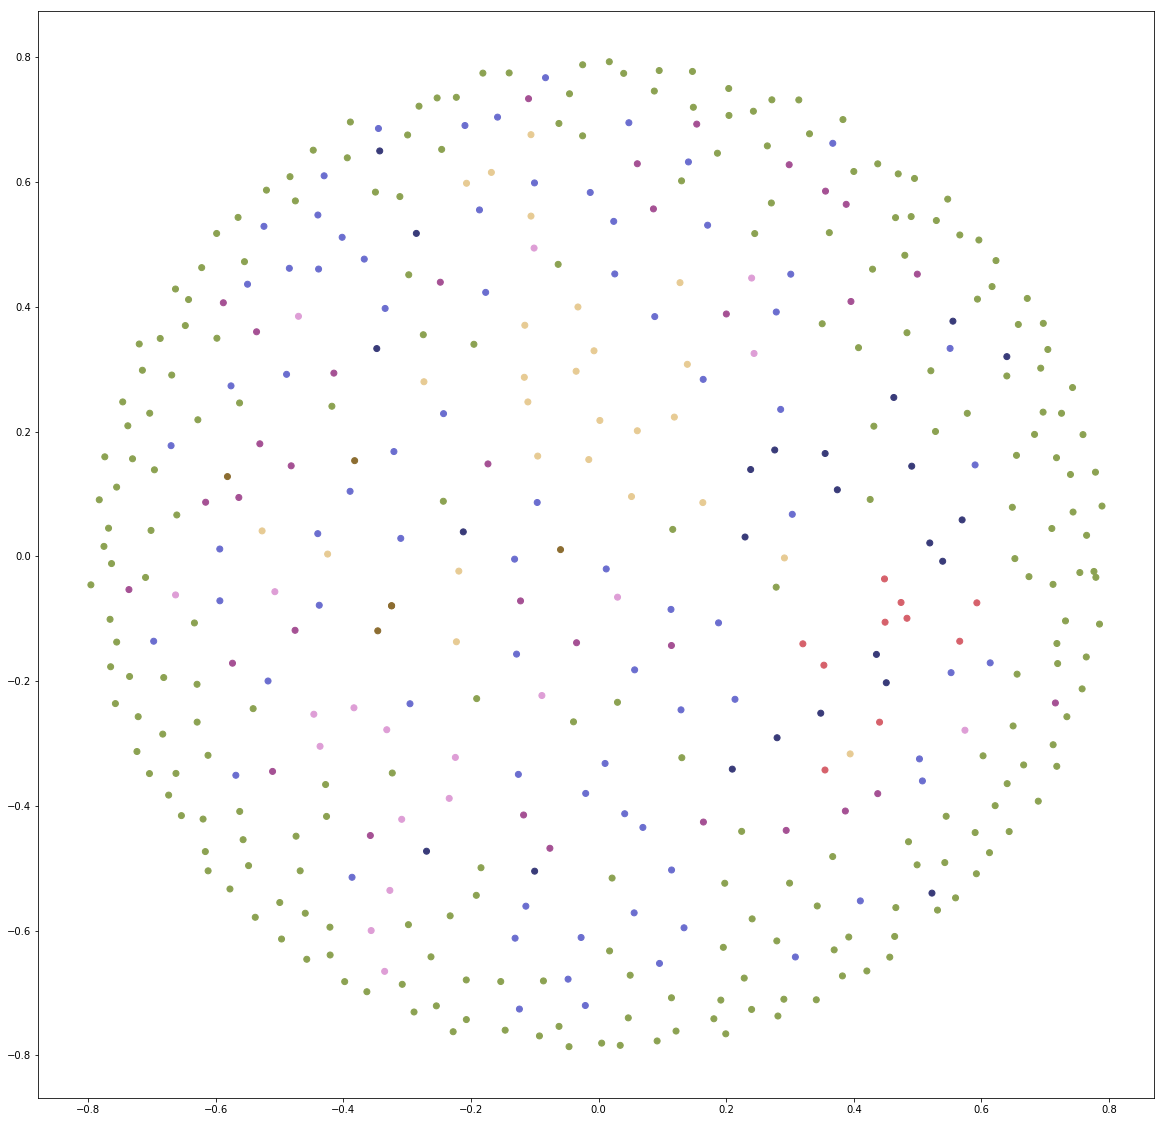

In [288]:
from sklearn.cluster import SpectralClustering

n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters, random_state=24, n_neighbors=8, 
                        gamma=0.01)
sc.fit(tfidf)

#Predicted clusters.
predict=sc.fit_predict(tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict, cmap='tab20b')
plt.show()

In [160]:
labels = sc.labels_
Counter(labels)

Counter({2: 242, 5: 10, 0: 24, 1: 77, 4: 26, 7: 19, 3: 6, 6: 34})

In [161]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(tfidf)

clusters = km.labels_.tolist()
centers = km.cluster_centers_

Wall time: 1.05 s


In [162]:
Counter(clusters)

Counter({3: 247, 0: 62, 1: 55, 2: 44, 4: 30})

In [163]:
stanza_df.reset_index(inplace=True)
stanza_df.drop(columns='index', inplace=True)

In [164]:
stanza_df.head()

,title,author,period,stanza
0,truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes..."
1,truth,chaucer,period 15,"tempest the nought al croked to redresse, in t..."
2,truth,chaucer,period 15,"that the is sent, receyve in buxumnesse; the w..."
3,truth,chaucer,period 15,"therfore, thou vache, leve thine olde wrechedn..."
4,torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne as fer as c..."


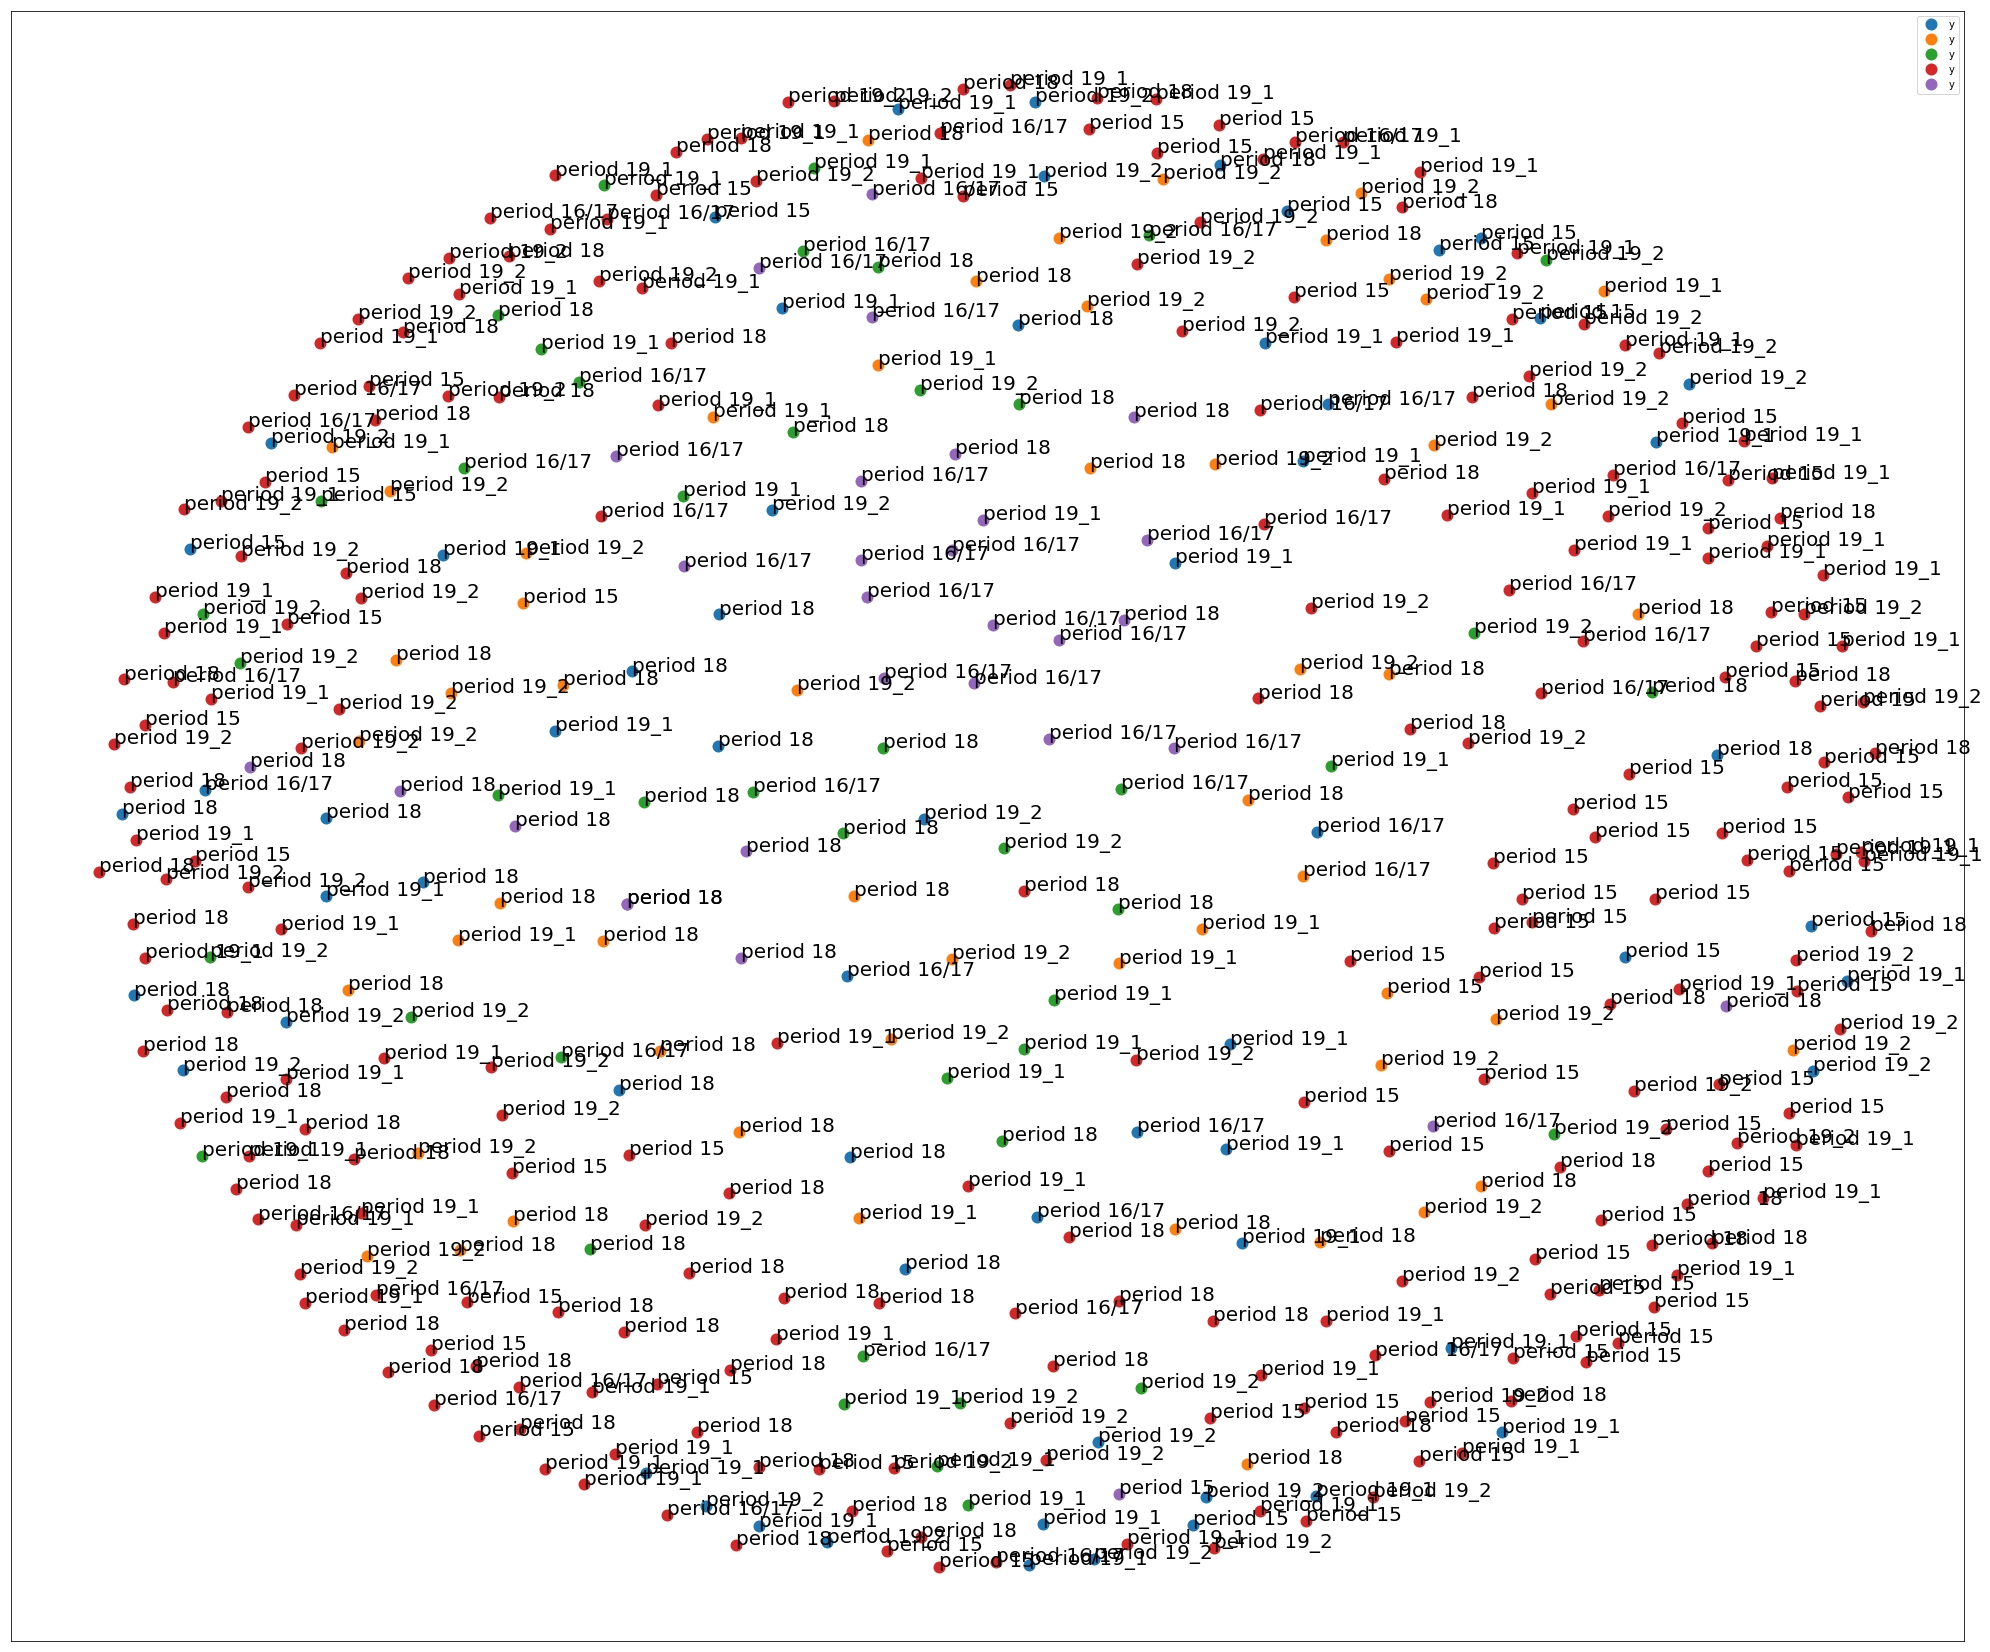

In [165]:
df_clusters = pd.DataFrame(dict(x=xs, y=ys, label=clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df_clusters)):
    ax.text(df_clusters.ix[i]['x'], df_clusters.ix[i]['y'], df_clusters.ix[i]['period'], size=20)  

    
    
plt.show() #show the plot

In [166]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=5, batch_size= 300, max_iter=10000, init='k-means++', random_state=24)
X = mbk.fit_transform(tfidf)
mini_clusters = mbk.labels_.tolist()

In [167]:
Counter(mini_clusters)

Counter({0: 260, 2: 92, 3: 33, 4: 29, 1: 24})

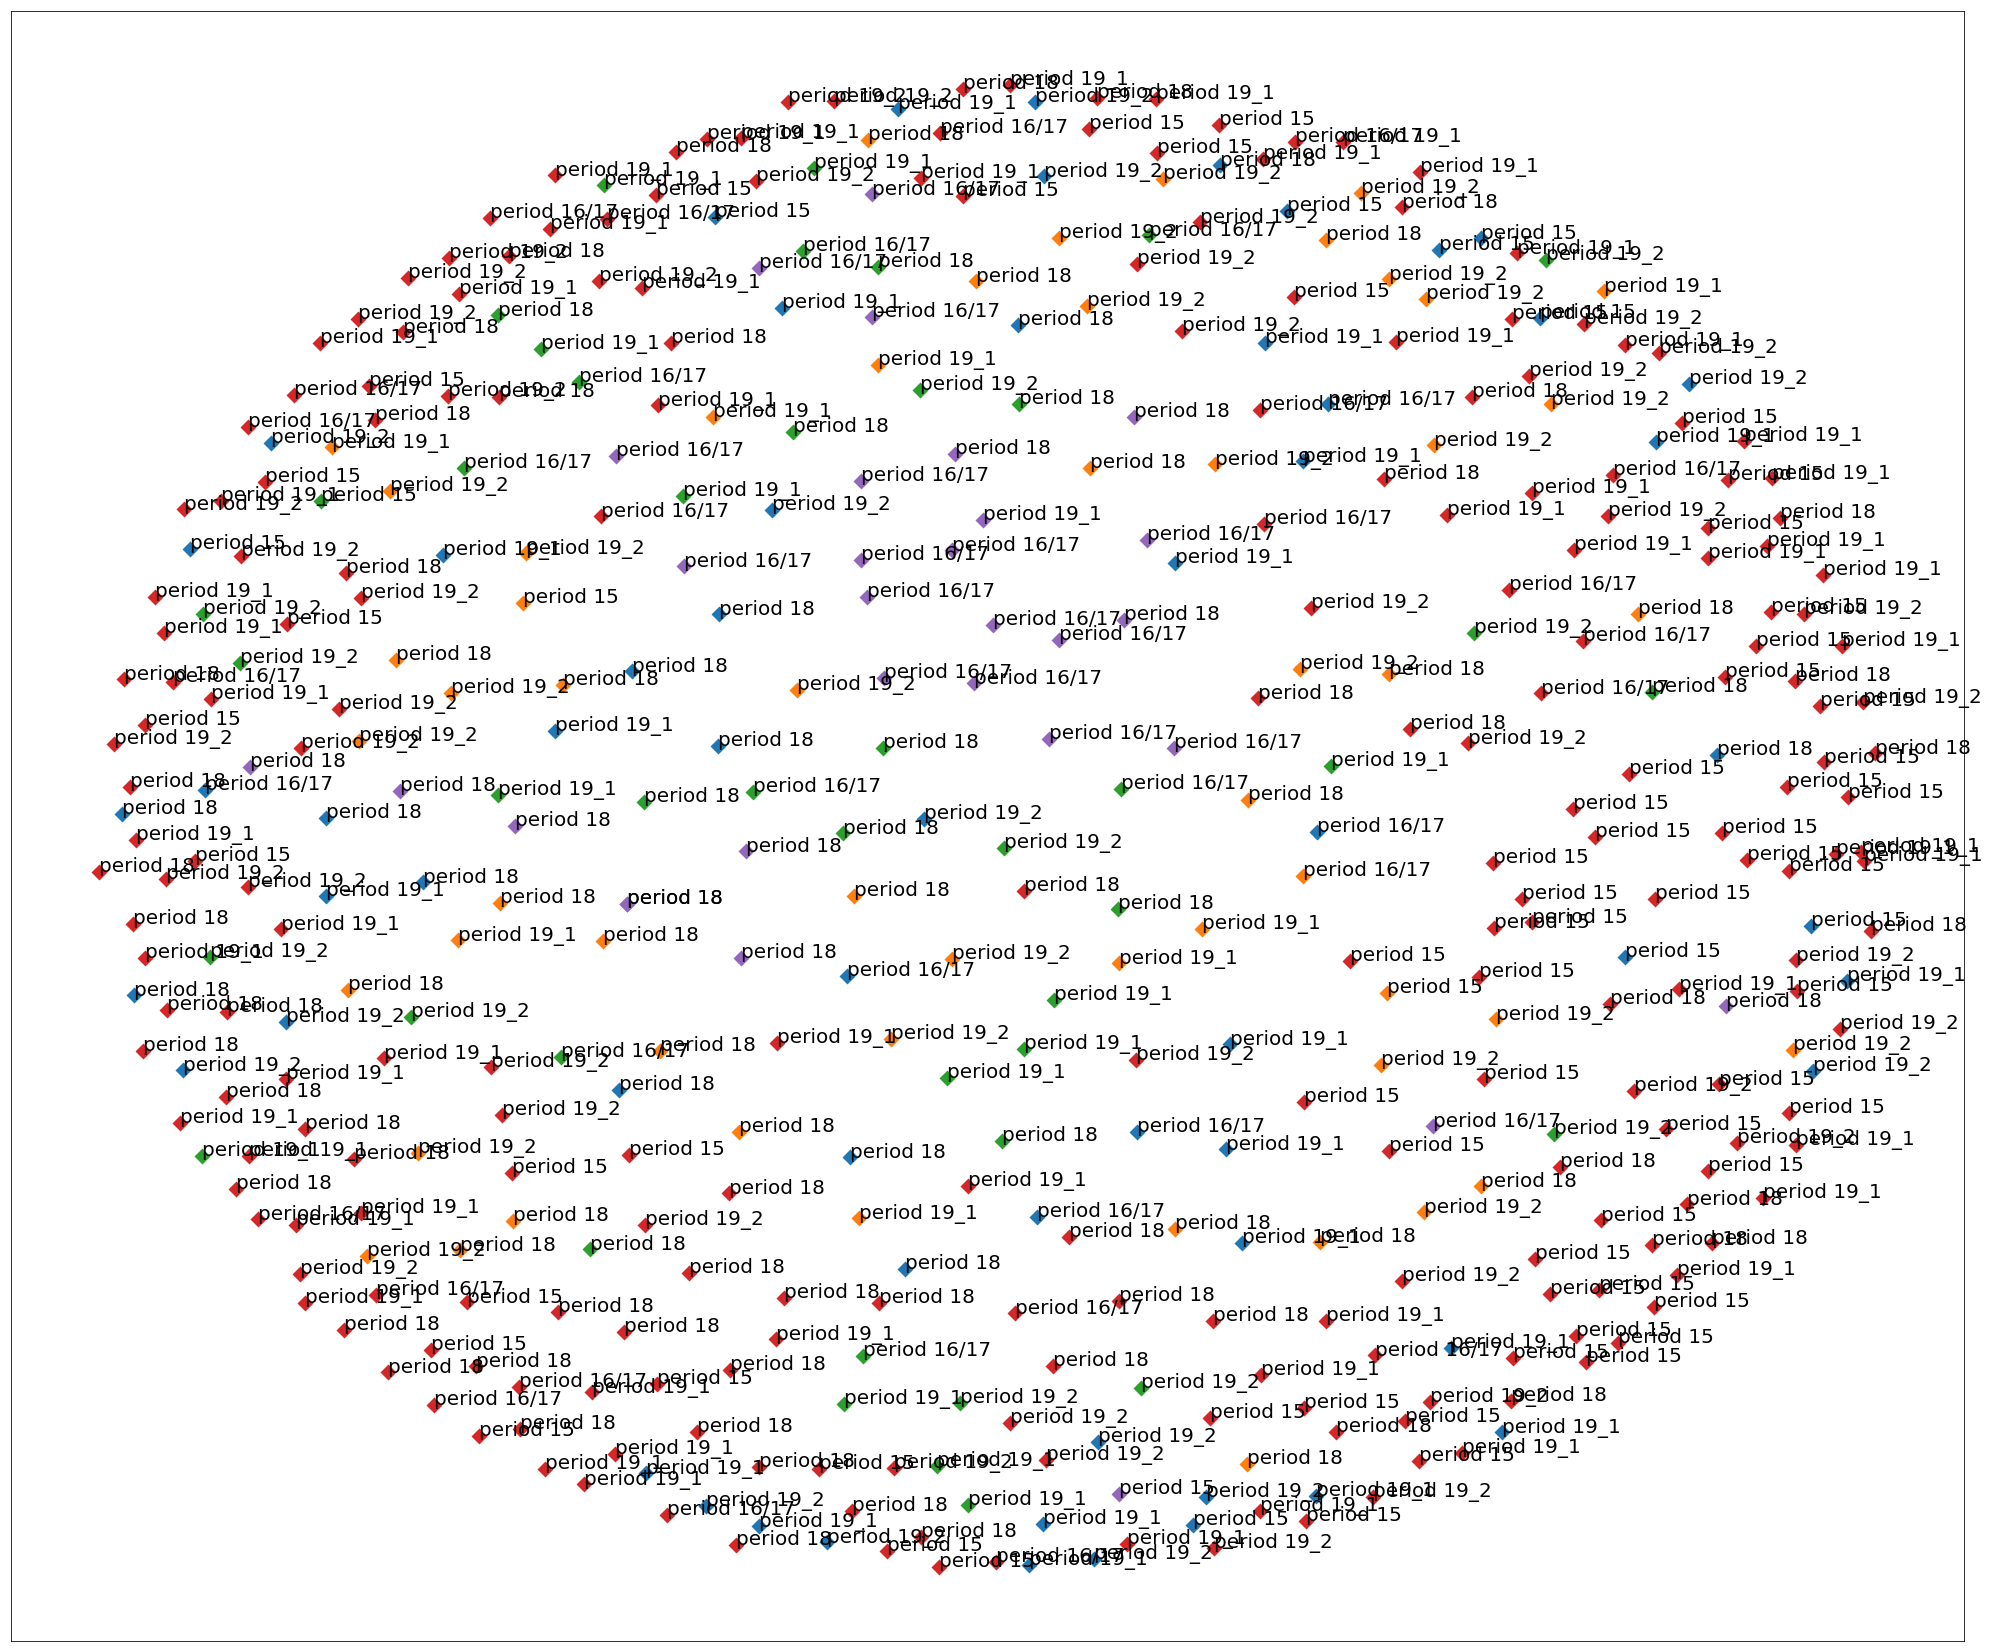

In [168]:
df_mini = pd.DataFrame(dict(x=xs, y=ys, label=mini_clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups_mini = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups_mini:
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')

for i in range(len(df_mini)):
    ax.text(df_mini.iloc[i,0], df_mini.iloc[i,1], df_mini.iloc[i,5], size=20)  

    
    
plt.show() #show the plot

In [169]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(tfidf.toarray(), quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(tfidf.toarray())

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


In [170]:
terms = vectorizer.get_feature_names()
order_centroids_mbk = mbk.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_mbk[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: thy ye thee love bird thou dead men woman let
Cluster 1: night sea day singing word whisperd blow listen let sound
Cluster 2: white theyr love crowd far wyth does come shine little
Cluster 3: world america passed shall im children old stand new death
Cluster 4: like rise clear want stars don death eyes going love


In [171]:
order_centroids_km = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_km[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: night singing heart day sea knew lyke crowd sang days
Cluster 1: like rise just love don death make america ll cool
Cluster 2: bird let sound wings wind sings night heard sea caged
Cluster 3: love ye white dead far wyth little al whan smile
Cluster 4: thee thy thou shall america let st aught blow art


In [290]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(190)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa_fit = lsa.fit_transform(tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

stanza_by_component=pd.DataFrame(lsa_fit,index=stanza_df.loc[:,'period'])
for i in range(6):
    print('Component {}:'.format(i))
    print(stanza_by_component.loc[:,i].sort_values(ascending=False)[0:4])

Percent variance captured by all components: 70.60854958795058
Component 0:
period
period 16/17    0.525290
period 19_2     0.438288
period 18       0.401241
period 16/17    0.400949
Name: 0, dtype: float64
Component 1:
period
period 15    0.557762
period 15    0.554137
period 15    0.498400
period 15    0.491260
Name: 1, dtype: float64
Component 2:
period
period 16/17    0.576844
period 19_1     0.473107
period 18       0.439671
period 18       0.399551
Name: 2, dtype: float64
Component 3:
period
period 18       0.513975
period 16/17    0.346939
period 18       0.345718
period 18       0.336773
Name: 3, dtype: float64
Component 4:
period
period 15    0.403224
period 18    0.356983
period 15    0.349107
period 18    0.340144
Name: 4, dtype: float64
Component 5:
period
period 19_2    0.762489
period 19_2    0.720160
period 19_1    0.639682
period 19_2    0.458490
Name: 5, dtype: float64


In [173]:
type(lsa_fit)

numpy.ndarray

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [223]:
df_class = pd.merge(stanza_df, tfidf_df, right_index=True, left_index=True)

In [175]:
print(Y)

0      chaucer
1      chaucer
2      chaucer
3      chaucer
4      chaucer
5      chaucer
6      chaucer
7      chaucer
8      chaucer
9      chaucer
10     chaucer
11     chaucer
12     chaucer
13     chaucer
14     chaucer
15     chaucer
16     chaucer
17     skelton
18     skelton
19     skelton
20     skelton
21     skelton
22     skelton
23     skelton
24     skelton
25     skelton
26     skelton
27     skelton
28     skelton
29     skelton
        ...   
408      plath
409      plath
410      plath
411      plath
412      plath
413      plath
414      plath
415      plath
416      plath
417      plath
418      plath
419      plath
420      plath
421      plath
422      plath
423      plath
424      plath
425      plath
426      plath
427      plath
428      plath
429      plath
430    angelou
431    angelou
432    angelou
433    angelou
434    angelou
435    angelou
436    angelou
437    angelou
Name: author, Length: 438, dtype: object


In [228]:
df_class.drop(columns=['title', 'period', 'stanza', 'author_y'], inplace=True)

In [237]:
sdf_class['period'] = stanza_df['period']

In [212]:
len(x_train)

328

In [240]:
X = df_class.iloc[:,1:1832]
Y = df_class.iloc[:,0]
Y_2 = df_class.loc[:, 'period']

x_train, x_test, ya_train, ya_test = train_test_split(X,Y,test_size=0.25, random_state=24)
_, _, yp_train, yp_test = train_test_split(X, Y_2, test_size=0.25, random_state=24)

In [274]:
lr = LogisticRegression(random_state=33)
lr.fit(x_train, ya_train)
print('train score:', lr.score(x_train, ya_train))
print('test score:', lr.score(x_test, ya_test))

train score: 0.7804878048780488
test score: 0.3


In [275]:
rfc = RandomForestClassifier(random_state=33)
rfc.fit(x_train, ya_train)
print('train score:', rfc.score(x_train, ya_train))
print('test score:', rfc.score(x_test, ya_test))

train score: 0.9878048780487805
test score: 0.38181818181818183


In [277]:
gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=500, subsample=0.8, max_depth=5,
                                random_state=33)
gbc.fit(x_train, ya_train)
print('train score:', gbc.score(x_train, ya_train))
print('test score:', gbc.score(x_test, ya_test))

train score: 0.9603658536585366
test score: 0.4


In [278]:
lr.fit(x_train, yp_train)
print('train score:', lr.score(x_train, yp_train))
print('test score:', lr.score(x_test, yp_test))

train score: 0.9451219512195121
test score: 0.5454545454545454


In [279]:
rfc.fit(x_train, yp_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [280]:
print('train score:', rfc.score(x_train, yp_train))
print('test score:', rfc.score(x_test, yp_test))

train score: 0.9847560975609756
test score: 0.4909090909090909


In [281]:
gbc.fit(x_train, yp_train)
print('train score:', gbc.score(x_train, yp_train))
print('test score:', gbc.score(x_test, yp_test))

train score: 0.8567073170731707
test score: 0.4636363636363636
